In [1]:
#importing required libraries for classification
import pandas as pd
from sklearn.utils import resample
from pycaret.classification import *
from sklearn.utils import resample

In [2]:
#loading the cleaned data
df =  pd.read_pickle('stroke_cleaned_data.pkl')

In [3]:
df.tail(30)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
5079,Male,1.72,0,0,No,children,Urban,77.28,17.1,0
5080,Female,29.00,0,0,Yes,Self-employed,Urban,90.52,28.0,0
5081,Male,55.00,0,0,Yes,Govt_job,Rural,108.35,40.8,0
5082,Female,44.00,0,0,Yes,Private,Rural,72.03,37.5,0
5083,Female,19.00,0,0,No,Private,Urban,90.57,24.2,0
5084,Male,67.00,0,0,Yes,Private,Rural,97.04,26.9,0
5085,Female,72.00,0,0,Yes,Private,Urban,83.89,33.1,0
5086,Female,51.00,0,0,Yes,Private,Urban,152.56,21.8,0
5087,Female,63.00,0,0,Yes,Self-employed,Rural,75.93,34.7,0
5088,Female,64.00,1,0,Yes,Self-employed,Urban,76.89,30.2,0


### Handling imbalanced data

In [4]:
#data with patients who had stroke
stroke  = df[df['stroke'] == 1]

In [5]:
stroke.shape

(242, 10)

In [6]:
#data with patients who did not have stroke
no_stroke  = df[df['stroke'] == 0]

In [7]:
no_stroke.shape

(4720, 10)

#### Downsampling the data

In [8]:
stroke_rsmpl = resample(stroke, replace = False, n_samples = 242, random_state = 42)

In [9]:
no_stroke_rsmpl = resample(no_stroke, replace = False, n_samples = 500, random_state = 42)

In [10]:
#final balanced data
sampled_df = pd.concat([stroke_rsmpl, no_stroke_rsmpl])

In [11]:
sampled_df.shape

(742, 10)

### Model Building

In [12]:
#setup for pycaret
#label is stroke
#Normalizing data using Z score method
setup = setup(sampled_df, target = 'stroke', normalize = True)

,Description,Value
0,session_id,2685
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(742, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
#training and comparing different classification models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7630,0.0000,0.6272,0.6430,0.6279,0.4559,0.4615,0.0140
lda,Linear Discriminant Analysis,0.7592,0.8286,0.6452,0.6358,0.6329,0.4557,0.4618,0.0160
ada,Ada Boost Classifier,0.7573,0.8108,0.6092,0.6424,0.6179,0.4427,0.4481,0.0820
lr,Logistic Regression,0.7572,0.8287,0.6029,0.6416,0.6148,0.4396,0.4451,0.7120
gbc,Gradient Boosting Classifier,0.7515,0.8138,0.6213,0.6265,0.6154,0.4340,0.4402,0.0750
rf,Random Forest Classifier,0.7379,0.7888,0.5614,0.6082,0.5761,0.3889,0.3946,0.2130
svm,SVM - Linear Kernel,0.7340,0.0000,0.6375,0.6333,0.5808,0.3998,0.4236,0.0170
lightgbm,Light Gradient Boosting Machine,0.7302,0.8019,0.5669,0.5931,0.5733,0.3779,0.3823,0.0440
et,Extra Trees Classifier,0.7149,0.7534,0.5239,0.5717,0.5390,0.3356,0.3405,0.1860
knn,K Neighbors Classifier,0.7129,0.7494,0.4702,0.5749,0.5129,0.3132,0.3191,0.0230


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2685,
                solver='auto', tol=0.001)

#### For our use case, we need high recall and Linear Discriminant Analysis is working well with this respect. 

In [14]:
#creating LDA model
stroke_model = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,0.8785,0.6875,0.7857,0.7333,0.6259,0.6287
1,0.6923,0.7483,0.7500,0.5000,0.6000,0.3659,0.3858
2,0.7115,0.8229,0.6875,0.5238,0.5946,0.3770,0.3854
3,0.7308,0.7597,0.6471,0.5789,0.6111,0.4062,0.4077
4,0.7308,0.7815,0.5294,0.6000,0.5625,0.3692,0.3707
5,0.8269,0.9361,0.5882,0.8333,0.6897,0.5745,0.5913
6,0.7692,0.8387,0.5882,0.6667,0.6250,0.4593,0.4611
7,0.8269,0.8975,0.8235,0.7000,0.7568,0.6238,0.6288
8,0.6923,0.8084,0.5882,0.5263,0.5556,0.3214,0.3225
9,0.7647,0.8143,0.5625,0.6429,0.6000,0.4344,0.4363


In [15]:
#tuning the model
tuned_stroke_model = tune_model(stroke_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,0.9062,0.7500,0.7500,0.7500,0.6389,0.6389
1,0.6923,0.7309,0.8750,0.5000,0.6364,0.4023,0.4501
2,0.7500,0.8368,0.7500,0.5714,0.6486,0.4601,0.4703
3,0.7500,0.7613,0.7647,0.5909,0.6667,0.4719,0.4819
4,0.7692,0.7832,0.6471,0.6471,0.6471,0.4756,0.4756
5,0.8654,0.9210,0.7059,0.8571,0.7742,0.6796,0.6861
6,0.8077,0.8723,0.7647,0.6842,0.7222,0.5759,0.5779
7,0.8269,0.8689,0.8824,0.6818,0.7692,0.6344,0.6479
8,0.7115,0.8034,0.6471,0.5500,0.5946,0.3730,0.3760
9,0.7255,0.7893,0.5000,0.5714,0.5333,0.3401,0.3416


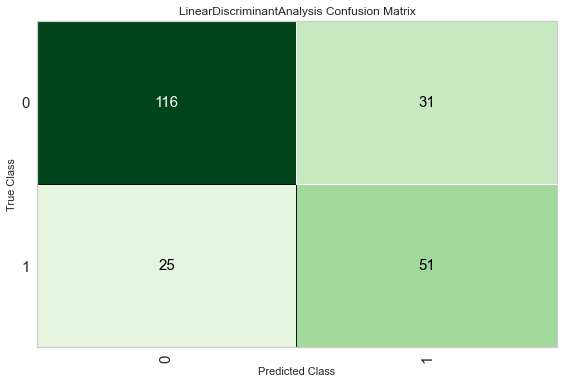

In [16]:
#plotting confusion matrix
plot_model(tuned_stroke_model, 'confusion_matrix')

In [17]:
#testing the model
predictions = predict_model(tuned_stroke_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7489,0.8303,0.6711,0.6220,0.6456,0.4516,0.4523


In [18]:
#finalizing the model
finalize_model(tuned_stroke_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.5,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [19]:
#saving the model as pickle file
save_model(tuned_stroke_model, 'final_stroke_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('dummy', Dummify(target='stroke')),
                 ('fix_perfect', Remove_100(target='stroke')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('d

#### Loading and checking the saved pickle model

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [21]:
df1 = pd.DataFrame([], columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'])
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi


In [22]:
df1.loc[0] = ['Female', 44.0, 0, 0, 'Yes', 'Govt_job', 'Urban', 85.28, 26.2]

In [23]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2


In [28]:
model= load_model('final_stroke_model')

Transformation Pipeline and Model Successfully Loaded


In [29]:
pred = predict_model(model, data = df1)

In [30]:
pred

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,Label,Score
0,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,0,0.894


In [31]:
prediction = pred.Label[0]
prediction

0